# Improvement

The dataset that is used in this project is very unbalanced. Most jobs are real, and few are fraudulent. Due to this, real jobs are being identified quite well. Certain techniques, like SMOTE, can be used to generate synthetic minority class samples. A balanced dataset should be able to generate better results


## Import **LIBRARIES**

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import re #do regex operations
from wordcloud import WordCloud,STOPWORDS 
from sklearn.preprocessing import LabelEncoder

#Visualize
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
#
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

# models
from sklearn.svm import SVC
import time

### loading The Dataset

In [ ]:
#LOADING THE DATASET
df1 = pd.read_csv("/content/fake_job_postings.csv")
df1.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


##Check All informetion about Dataset

In [ ]:
df1.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [ ]:
df1.shape

(17880, 18)

In [ ]:
# Check for NaN values in the data
df1.isnull().sum().sort_values(ascending = False).loc[df1.dtypes == 'object']


salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
title                      0
dtype: int64

In [ ]:
columns = df1.columns.tolist()
columns = [c for c in columns if c not in ["fraudulent"]]
target = "fraudulent"
state = np.random.RandomState(42)
X =df1[columns]
Y = df1["fraudulent"]

from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_rus, y_rus = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_rus) 
df2 = pd.DataFrame(y_rus)

result = pd.concat([df1, df2], axis=1, join='inner')
display(result)
df1=result;

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,8398,Senior Network Engineer,"BE, , Brussels",NaN,NaN,EUROPEAN DYNAMICS (#URL_c66532ffa1ce76ab447da6...,We currently have a vacancy for a Senior Netwo...,Your skills:University degree in information t...,Our offer: If you are seeking a career in an e...,0,1,0,Full-time,Associate,Bachelor's Degree,Computer Software,Information Technology,0
1,4103,Product Intern,"GB, , London",Product,NaN,Want to build a 21st century financial service...,TransferWise is a fast growing startup helping...,Do you?- Enjoy problem solving - Find meaning ...,"This internship is paid minimum wage, but we s...",0,1,1,Full-time,Internship,NaN,Internet,Product Management,0
2,4685,Freelance Danish speaker (m),"DE, BE, Berlin",Didactics,NaN,Babbel enables anyone to learn languages in an...,We are looking for a male speaker for Danish s...,"Previous experience as a speaker, actor or sin...",A flexible working scheduleWork from home or i...,0,1,1,Other,NaN,NaN,E-Learning,Other,0
3,8008,Web Designer - Birmingham,"GB, BIR,",Development,NaN,The Beans Group is a media company that exists...,Award-Winning Technology Media Company Seek a ...,Be comfortable taking a data-led approach to d...,Life at The Beans GroupThere are many things t...,0,1,0,Full-time,Associate,High School or equivalent,Marketing and Advertising,Production,0
4,2880,Sr. .NET / Azure Developer,"US, CA, San Diego",NaN,NaN,Embarke is increasing email opens and clicks f...,ABOUT EMBARKEEmbarke performs behavioral analy...,"10+ years of experience, or equivalentEntrepre...",Learn more about us here.Values – Our culture ...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
1728,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1729,17830,Android Developer,"PL, MZ, Warsaw",NaN,NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
1730,17831,Payroll Clerk,"US, NY, New York",NaN,NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing,1


## Under Sampling to balance Data

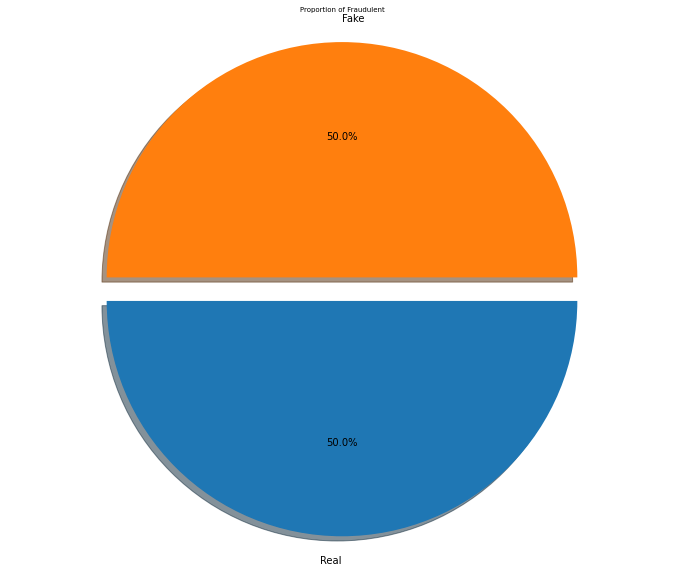

In [ ]:
labels = 'Real', 'Fake'
sizes = [df1.fraudulent[df1['fraudulent']== 0].count(), df1.fraudulent[df1['fraudulent']== 1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

In [ ]:
# Replace NaN values with a blank entry
df1.fillna('', inplace = True)

# Check null Values

In [ ]:
# Check for NaN values in the data
df1.isnull().sum().sort_values(ascending = False).loc[df1.dtypes == 'object']


title                  0
function               0
industry               0
required_education     0
required_experience    0
employment_type        0
benefits               0
requirements           0
description            0
company_profile        0
salary_range           0
department             0
location               0
dtype: int64

##### Demo

In [ ]:
A=df1['description'][0]

In [ ]:
B=df1['requirements'][0]

In [ ]:
A+''+str(print("---"))+B

---


'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staffNoneExperience with content management systems a major plus (any blogging counts!)Familiar wit

In [ ]:
JobPostDF_Final = df1.copy()
JobPostDF_Final.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,8398,Senior Network Engineer,"BE, , Brussels",,,EUROPEAN DYNAMICS (#URL_c66532ffa1ce76ab447da6...,We currently have a vacancy for a Senior Netwo...,Your skills:University degree in information t...,Our offer: If you are seeking a career in an e...,0,1,0,Full-time,Associate,Bachelor's Degree,Computer Software,Information Technology,0
1,4103,Product Intern,"GB, , London",Product,,Want to build a 21st century financial service...,TransferWise is a fast growing startup helping...,Do you?- Enjoy problem solving - Find meaning ...,"This internship is paid minimum wage, but we s...",0,1,1,Full-time,Internship,,Internet,Product Management,0
2,4685,Freelance Danish speaker (m),"DE, BE, Berlin",Didactics,,Babbel enables anyone to learn languages in an...,We are looking for a male speaker for Danish s...,"Previous experience as a speaker, actor or sin...",A flexible working scheduleWork from home or i...,0,1,1,Other,,,E-Learning,Other,0
3,8008,Web Designer - Birmingham,"GB, BIR,",Development,,The Beans Group is a media company that exists...,Award-Winning Technology Media Company Seek a ...,Be comfortable taking a data-led approach to d...,Life at The Beans GroupThere are many things t...,0,1,0,Full-time,Associate,High School or equivalent,Marketing and Advertising,Production,0
4,2880,Sr. .NET / Azure Developer,"US, CA, San Diego",,,Embarke is increasing email opens and clicks f...,ABOUT EMBARKEEmbarke performs behavioral analy...,"10+ years of experience, or equivalentEntrepre...",Learn more about us here.Values – Our culture ...,0,1,1,,,,,,0


In [ ]:
JobPostDF_Final['text-corpus'] = JobPostDF_Final['description'] + ' ' + JobPostDF_Final['requirements']
JobPostDF_Final.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text-corpus
0,8398,Senior Network Engineer,"BE, , Brussels",,,EUROPEAN DYNAMICS (#URL_c66532ffa1ce76ab447da6...,We currently have a vacancy for a Senior Netwo...,Your skills:University degree in information t...,Our offer: If you are seeking a career in an e...,0,1,0,Full-time,Associate,Bachelor's Degree,Computer Software,Information Technology,0,We currently have a vacancy for a Senior Netwo...
1,4103,Product Intern,"GB, , London",Product,,Want to build a 21st century financial service...,TransferWise is a fast growing startup helping...,Do you?- Enjoy problem solving - Find meaning ...,"This internship is paid minimum wage, but we s...",0,1,1,Full-time,Internship,,Internet,Product Management,0,TransferWise is a fast growing startup helping...
2,4685,Freelance Danish speaker (m),"DE, BE, Berlin",Didactics,,Babbel enables anyone to learn languages in an...,We are looking for a male speaker for Danish s...,"Previous experience as a speaker, actor or sin...",A flexible working scheduleWork from home or i...,0,1,1,Other,,,E-Learning,Other,0,We are looking for a male speaker for Danish s...
3,8008,Web Designer - Birmingham,"GB, BIR,",Development,,The Beans Group is a media company that exists...,Award-Winning Technology Media Company Seek a ...,Be comfortable taking a data-led approach to d...,Life at The Beans GroupThere are many things t...,0,1,0,Full-time,Associate,High School or equivalent,Marketing and Advertising,Production,0,Award-Winning Technology Media Company Seek a ...
4,2880,Sr. .NET / Azure Developer,"US, CA, San Diego",,,Embarke is increasing email opens and clicks f...,ABOUT EMBARKEEmbarke performs behavioral analy...,"10+ years of experience, or equivalentEntrepre...",Learn more about us here.Values – Our culture ...,0,1,1,,,,,,0,ABOUT EMBARKEEmbarke performs behavioral analy...


In [ ]:
for col in JobPostDF_Final.select_dtypes(include=['object']).drop(columns=['text-corpus']):
    JobPostDF_Final.drop(columns=[col], inplace = True)

In [ ]:
JobPostDF_Final.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,text-corpus
0,8398,0,1,0,0,We currently have a vacancy for a Senior Netwo...
1,4103,0,1,1,0,TransferWise is a fast growing startup helping...
2,4685,0,1,1,0,We are looking for a male speaker for Danish s...
3,8008,0,1,0,0,Award-Winning Technology Media Company Seek a ...
4,2880,0,1,1,0,ABOUT EMBARKEEmbarke performs behavioral analy...


In [ ]:
JobPostDF_Final = JobPostDF_Final.drop(columns=['job_id','telecommuting', 'has_company_logo', 'has_questions'])
JobPostDF_Final.head()

,fraudulent,text-corpus
0,0,We currently have a vacancy for a Senior Netwo...
1,0,TransferWise is a fast growing startup helping...
2,0,We are looking for a male speaker for Danish s...
3,0,Award-Winning Technology Media Company Seek a ...
4,0,ABOUT EMBARKEEmbarke performs behavioral analy...


In [ ]:
JobPostDF_Final['text-corpus'][0]

'We currently have a vacancy for a Senior Network Engineer, fluent in English, to offer his/her services as an expert in various projects of the company across Europe (mainly in Belgium, France and Germany – the expert may decide to undertake missions to the locations of the clients from any location or even be based in the same city as the client).\xa0Your tasks:Construct and maintain configurations for data networks;Design, test and install network software and hardware;Perform troubleshooting of network problems using network analysers and/or sniffers and other troubleshooting tools;Deal with network related documentation (develop/update/review) and technical specifications;Configure and implement network monitoring and management systems;Implement and monitor network security;Plan network capacity/estimate network utilisation;Analyse current network software and propose modifications and new software according to best practice standards and procedures;Engage with vendors offering n

Data Cleaning

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
def remove(text):
    words = nltk.RegexpTokenizer(r"\w+").tokenize(text)
    
    return words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# remove stopwords function
stop = set(stopwords.words('english'))
def test(text):
    words = remove(text)
    stripped_phrase = []
    for word in words:
        if word not in stop:
            stripped_phrase.append(word)

    return " ".join(stripped_phrase)

# perform stemming function



In [ ]:
def stem(text):
    stemmer = PorterStemmer()
    stemmed_phrase = []
    words = remove(text)
    for word in words:
        stemmed_phrase.append(stemmer.stem(word))
    
    return " ".join(stemmed_phrase)

# remove stopwords

In [ ]:
JobPostDF_Final['text-corpus'] = JobPostDF_Final['text-corpus'].apply(test)
JobPostDF_Final['text-corpus'][0]

'We currently vacancy Senior Network Engineer fluent English offer services expert various projects company across Europe mainly Belgium France Germany expert may decide undertake missions locations clients location even based city client Your tasks Construct maintain configurations data networks Design test install network software hardware Perform troubleshooting network problems using network analysers sniffers troubleshooting tools Deal network related documentation develop update review technical specifications Configure implement network monitoring management systems Implement monitor network security Plan network capacity estimate network utilisation Analyse current network software propose modifications new software according best practice standards procedures Engage vendors offering network related services equipment Your skills University degree information technology 9 years relevant professional experience Advanced knowledge networks LAN WAN Advanced knowledge firewall VPN 

In [ ]:
# Perform stemming
JobPostDF_Final['text-corpus'] = JobPostDF_Final['text-corpus'].apply(stem)
JobPostDF_Final['text-corpus'][0]

'we current vacanc senior network engin fluent english offer servic expert variou project compani across europ mainli belgium franc germani expert may decid undertak mission locat client locat even base citi client your task construct maintain configur data network design test instal network softwar hardwar perform troubleshoot network problem use network analys sniffer troubleshoot tool deal network relat document develop updat review technic specif configur implement network monitor manag system implement monitor network secur plan network capac estim network utilis analys current network softwar propos modif new softwar accord best practic standard procedur engag vendor offer network relat servic equip your skill univers degre inform technolog 9 year relev profession experi advanc knowledg network lan wan advanc knowledg firewal vpn load balanc configur troubleshoot veri good knowledg network encrypt secur protocol veri good knowledg network design network capac plan network evolut 

#Extract features

In [ ]:
X = JobPostDF_Final['text-corpus']
X.shape

(1732,)

In [ ]:
X.head()

0    we current vacanc senior network engin fluent ...
1    transferwis fast grow startup help peopl trans...
2    we look male speaker danish sound record respo...
3    award win technolog media compani seek talent ...
4    about embarkeembark perform behavior analysi u...
Name: text-corpus, dtype: object

In [ ]:
Y = JobPostDF_Final['fraudulent']
Y.shape

(1732,)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [ ]:
train_y

array([0, 1, 1, ..., 1, 0, 0])

# Transform data to count matrix

In [ ]:
MAX = 3000

*feature_extraction*:

1-CountVectorizer 

2-TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# tfid = TfidfVectorizer(min_df=0, max_df=1, ngram_range=(1,3))
tfid = TfidfVectorizer(max_features = MAX,use_idf=True)

In [ ]:
# Transform train set
tfid_train = tfid.fit_transform(train_X)
# cv_train = cv.fit_transform(train_X)

# Transform test set
tfid_test = tfid.fit_transform(test_X)
# cv_test = cv.fit_transform(test_X)

print('Tfidf_train : ', tfid_train.shape)
# print('cv_train : ', cv_train.shape)

print('Tfidf_test : ', tfid_test.shape)

Tfidf_train :  (1385, 3000)
Tfidf_test :  (347, 3000)


#Modelling

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# set the model
nb_model = MultinomialNB()
# nb_model = GaussianNB()

# fit the dataset
nb_tfidf = nb_model.fit(tfid_train, train_y)
print(nb_tfidf)

MultinomialNB()


In [ ]:
nb_tfidf_predict = nb_model.predict(tfid_test)

In [ ]:
nb_tfidf_predict

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
nb_tfidf_score=accuracy_score(test_y, nb_tfidf_predict)
print("Accuracy  {:.3} %".format(accuracy_score(test_y, nb_tfidf_predict)*100))

Accuracy  50.1 %


In [ ]:
report = classification_report(test_y, nb_tfidf_predict, target_names = ['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.48      0.66      0.56       166
           1       0.53      0.35      0.43       181

    accuracy                           0.50       347
   macro avg       0.51      0.51      0.49       347
weighted avg       0.51      0.50      0.49       347



## SVM 

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(tfid_train, train_y)

SVC()

In [ ]:
predicted = svc.predict(tfid_test)

In [ ]:
print("accuracy score of Support Vector Machine:", accuracy_score(predicted, test_y), "\n")

accuracy score of Support Vector Machine: 0.5100864553314121 



In [ ]:
# creating a confusion matrix 
cm = confusion_matrix(test_y, predicted)
print("confusion matrix of SVM:\n", cm, "\n")


confusion matrix of SVM:
 [[158   8]
 [162  19]] 



In [ ]:
print("classification report:\n", classification_report(test_y, predicted), "\n")

classification report:
               precision    recall  f1-score   support

           0       0.49      0.95      0.65       166
           1       0.70      0.10      0.18       181

    accuracy                           0.51       347
   macro avg       0.60      0.53      0.42       347
weighted avg       0.60      0.51      0.41       347
 



Using Deep learing 

In [ ]:
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
df =df1[['description','requirements','fraudulent']]
df.head()

,description,requirements,fraudulent
0,We currently have a vacancy for a Senior Netwo...,Your skills:University degree in information t...,0
1,TransferWise is a fast growing startup helping...,Do you?- Enjoy problem solving - Find meaning ...,0
2,We are looking for a male speaker for Danish s...,"Previous experience as a speaker, actor or sin...",0
3,Award-Winning Technology Media Company Seek a ...,Be comfortable taking a data-led approach to d...,0
4,ABOUT EMBARKEEmbarke performs behavioral analy...,"10+ years of experience, or equivalentEntrepre...",0


In [ ]:
df.shape

(1732, 3)

In [ ]:
###Drop Nan Values
df=df.dropna()

In [ ]:
df.shape

(1732, 3)

In [ ]:
#Dependent feacture
new_X=df.drop('fraudulent',axis=1)
new_X.head()

,description,requirements
0,We currently have a vacancy for a Senior Netwo...,Your skills:University degree in information t...
1,TransferWise is a fast growing startup helping...,Do you?- Enjoy problem solving - Find meaning ...
2,We are looking for a male speaker for Danish s...,"Previous experience as a speaker, actor or sin..."
3,Award-Winning Technology Media Company Seek a ...,Be comfortable taking a data-led approach to d...
4,ABOUT EMBARKEEmbarke performs behavioral analy...,"10+ years of experience, or equivalentEntrepre..."


In [ ]:
## Get the Dependent features
new_y=df['fraudulent']
new_y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

In [ ]:
new_y.value_counts()

0    866
1    866
Name: fraudulent, dtype: int64

In [ ]:
voc_size=5000

In [ ]:
message = new_X.copy()

In [ ]:
message['description'][1]

"TransferWise is a fast growing startup helping people transfer money. Co-founded by Skype’s first employee and backed by some of planet's most experienced innovators, including PayPal founder &amp; Facebook's first investor Peter Thiel, we're disrupting the world of currency &amp; international money transfer. Our product team works on everything from implementing payment methods, designing features and identifying opportunities. To help our product managers through a period of high growth we're now offering a 3 month paid internship for the right boy or girl. As our first ever product intern we envision you a soon-to-be or\xa0recent graduate, ready to take in a huge amount of knowledge in short time period, without very much supervision. In return, you'll get the crash course of your life within a small world-class team."

In [ ]:
message.reset_index(inplace=True)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['description'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1]

'transferwis fast grow startup help peopl transfer money co found skype first employe back planet experienc innov includ paypal founder amp facebook first investor peter thiel disrupt world currenc amp intern money transfer product team work everyth implement payment method design featur identifi opportun help product manag period high growth offer month paid internship right boy girl first ever product intern envis soon recent graduat readi take huge amount knowledg short time period without much supervis return get crash cours life within small world class team'

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[1]

[2883,
 2724,
 1157,
 4141,
 2321,
 3708,
 1843,
 2642,
 2389,
 4853,
 565,
 2393,
 4467,
 2746,
 3671,
 3436,
 4215,
 3627,
 2742,
 2906,
 635,
 2974,
 2393,
 1995,
 3922,
 1719,
 286,
 1925,
 3905,
 635,
 3220,
 2642,
 1843,
 559,
 1550,
 4728,
 1580,
 244,
 3084,
 4856,
 3292,
 902,
 1948,
 2082,
 2321,
 559,
 1094,
 1820,
 3371,
 2578,
 2996,
 3506,
 301,
 4362,
 4496,
 1869,
 2391,
 2393,
 558,
 559,
 3220,
 860,
 2492,
 4513,
 2747,
 2135,
 741,
 2923,
 521,
 549,
 1358,
 1660,
 1820,
 971,
 2232,
 982,
 4543,
 1716,
 453,
 874,
 3672,
 2891,
 3411,
 1925,
 1843,
 1550]

In [ ]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 901 4729   82 ...  977 2727 3527]
 [1094 1820 3371 ... 1925 1843 1550]
 [   0    0    0 ...  170   57 4274]
 ...
 [   0    0 3288 ... 4950 3324 4618]
 [   0    0    0 ...  104  624   54]
 [   0    0    0 ... 4103 4560 1236]]


In [ ]:
a=embedded_docs[0]
len(a)

40

In [ ]:
## Creating model
embedding_vector_features=50
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) ##Just add bidirectional!!, except it would just behave as normal LSTM Model
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            250000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 371,001
Trainable params: 371,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),new_y.shape

(1732, (1732,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(new_y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=32)

In [ ]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=12,batch_size=64)

Epoch 1/12
21/21 [==============================] - 8s 172ms/step - loss: 0.6879 - accuracy: 0.5620 - val_loss: 0.6669 - val_accuracy: 0.5681
Epoch 2/12
21/21 [==============================] - 2s 118ms/step - loss: 0.5101 - accuracy: 0.7644 - val_loss: 0.5295 - val_accuracy: 0.7206
Epoch 3/12
21/21 [==============================] - 2s 118ms/step - loss: 0.2943 - accuracy: 0.8930 - val_loss: 0.4658 - val_accuracy: 0.8129
Epoch 4/12
21/21 [==============================] - 2s 116ms/step - loss: 0.1379 - accuracy: 0.9538 - val_loss: 0.5218 - val_accuracy: 0.8037
Epoch 5/12
21/21 [==============================] - 2s 116ms/step - loss: 0.0550 - accuracy: 0.9823 - val_loss: 0.6495 - val_accuracy: 0.8083
Epoch 6/12
21/21 [==============================] - 2s 119ms/step - loss: 0.0479 - accuracy: 0.9877 - val_loss: 0.7010 - val_accuracy: 0.7783
Epoch 7/12
21/21 [==============================] - 2s 118ms/step - loss: 0.0115 - accuracy: 0.9977 - val_loss: 0.9112 - val_accuracy: 0.7621
Epoch 

In [ ]:
y_pred=model1.predict(X_test)
y_pred

14/14 [==============================] - 1s 15ms/step


array([[9.9936640e-01],
       [3.3300850e-04],
       [9.9999571e-01],
       [9.4336897e-01],
       [2.4188342e-04],
       [2.2973462e-04],
       [3.0181187e-04],
       [9.9830341e-04],
       [9.9893749e-01],
       [1.4577127e-01],
       [4.1886512e-03],
       [4.8413352e-04],
       [9.9993145e-01],
       [3.2269390e-04],
       [7.0642820e-04],
       [9.9865931e-01],
       [3.5059950e-04],
       [9.9742734e-01],
       [9.8599386e-01],
       [1.3626135e-02],
       [9.9999446e-01],
       [9.9993527e-01],
       [2.6642557e-03],
       [1.1225560e-02],
       [3.0080448e-03],
       [9.9999279e-01],
       [9.8438472e-01],
       [9.9995404e-01],
       [9.6727622e-01],
       [9.9999386e-01],
       [2.4499500e-04],
       [9.9996322e-01],
       [9.9999410e-01],
       [9.6513724e-01],
       [2.4188919e-02],
       [7.1046856e-04],
       [1.3694785e-02],
       [9.9999386e-01],
       [3.7769481e-04],
       [4.3186301e-04],
       [5.8381882e-04],
       [9.999949

In [ ]:
y_pred = [1 if x >=0.5 else 0 for x in y_pred]
y_pred[5:20]

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0]

In [ ]:
confusion_matrix(y_test,y_pred)

array([[158,  70],
       [ 30, 175]])

In [ ]:
accuracy_score(y_test,y_pred)
print("Accuracy  {:.3} %".format(accuracy_score(y_test, y_pred)*100))

Accuracy  76.9 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       228
           1       0.71      0.85      0.78       205

    accuracy                           0.77       433
   macro avg       0.78      0.77      0.77       433
weighted avg       0.78      0.77      0.77       433



In [ ]:
#Accuracy score for Naive Bayes features

nb_tfidf_score=accuracy_score(test_y, nb_tfidf_predict)
print("Naive Bayes Accuracy  {:.3} %".format(accuracy_score(test_y, nb_tfidf_predict)*100))

Naive Bayes Accuracy  50.1 %


In [ ]:
print("Support Vector Machine Accuracy  {:.4} %".format(accuracy_score(predicted, test_y)*100))

Support Vector Machine Accuracy  51.01 %


In [ ]:
print("BiLSTM Accuracy  {:.3} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

BiLSTM Accuracy  76.9 %
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       228
           1       0.71      0.85      0.78       205

    accuracy                           0.77       433
   macro avg       0.78      0.77      0.77       433
weighted avg       0.78      0.77      0.77       433



## Conclusion

After using Under Sampling to balance Data (Balanced dataset) accuracy is dropout. That's mean need To generate more Data for client.

Data is not sufficient the accuracy is getting Down.

BiLSTM Accuracy  76.9 %
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       228
           1       0.71      0.85      0.78       205

    accuracy                           0.77       433
   macro avg       0.78      0.77      0.77       433
weighted avg       0.78      0.77      0.77       433

